In [7]:
# load libraries
library(Seurat)
library(ggplot2)
library(tidyverse)
# library(DoubletFinder)

In [10]:
# create counts matrix
cts <- ReadMtx(mtx = './data/raw_feature_bc_matrix/matrix.mtx.gz',
        features = './data/raw_feature_bc_matrix/features.tsv.gz',
        cells = './data/raw_feature_bc_matrix/barcodes.tsv.gz')

In [30]:
cts_dim <- dim(cts)
num_rows <- cts_dim[1]
num_cols <- cts_dim[2]

cat("Number of rows:", num_rows, "\n")
cat("Number of columns:", num_cols, "\n")

Number of rows: 36601 
Number of columns: 2099284 


In [31]:
head(cts)

  [[ suppressing 34 column names ‘AAACCCAAGAAACCAT-1’, ‘AAACCCAAGAAACCCA-1’, ‘AAACCCAAGAAACCCG-1’ ... ]]



6 x 2099284 sparse Matrix of class "dgCMatrix"
                                                                               
MIR1302-2HG . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM138A     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
OR4F5       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.1  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.2  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                  
MIR1302-2HG ......
FAM138A     ......
OR4F5       ......
AL627309.1  ......
AL627309.3  ......
AL627309.2  ......

 .....suppressing 2099250 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [32]:
cts[1:10,1:10]

  [[ suppressing 10 column names ‘AAACCCAAGAAACCAT-1’, ‘AAACCCAAGAAACCCA-1’, ‘AAACCCAAGAAACCCG-1’ ... ]]



10 x 10 sparse Matrix of class "dgCMatrix"
                               
MIR1302-2HG . . . . . . . . . .
FAM138A     . . . . . . . . . .
OR4F5       . . . . . . . . . .
AL627309.1  . . . . . . . . . .
AL627309.3  . . . . . . . . . .
AL627309.2  . . . . . . . . . .
AL627309.5  . . . . . . . . . .
AL627309.4  . . . . . . . . . .
AP006222.2  . . . . . . . . . .
AL732372.1  . . . . . . . . . .

In [33]:
# create Seurat object
pbmc.seurat <- CreateSeuratObject(counts = cts)
str(pbmc.seurat)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:27687445] 5765 20003 8524 33183 5207 6163 13111 19959 593 25522 ...
  .. .. .. .. .. ..@ p       : int [1:2099285] 0 0 1 1 2 4 4 4 8 9 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 36601 2099284
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. .. .. .. ..$ : chr [1:2099284] "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" "AAACCCAAGAAACTAC-1" ...
  .. .. .. .. .. ..@ x       : num [1:27687445] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:27687445] 5765 20003 8524 3

In [20]:
# QC and Filtering
# explore QC

pbmc.seurat$mitoPercent <- PercentageFeatureSet(pbmc.seurat, pattern = '^MT-')

pbmc.seurat.filtered <- subset(pbmc.seurat, subset = nCount_RNA > 800 &
         nFeature_RNA > 500 &
         mitoPercent < 10)

pbmc.seurat
pbmc.seurat.filtered

An object of class Seurat 
36601 features across 2099284 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

An object of class Seurat 
36601 features across 10017 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

Centering and scaling data matrix

PC_ 1 
Positive:  CD3E, LTB, IL32, CD3D, TRAC, CD3G, TRBC2, BCL11B, MALAT1, IL7R 
	   ETS1, ARL4C, CD2, LIME1, CD7, TCF7, LINC00861, PRKCQ-AS1, CD27, CCR7 
	   TRBC1, CD247, FCMR, GZMM, LEF1, ISG20, MAL, BCL2, SYNE2, OXNAD1 
Negative:  FGL2, FCN1, CST3, LYZ, TYMP, CTSS, MNDA, CYBB, IFI30, PSAP 
	   SERPINA1, NCF2, TYROBP, LST1, AIF1, S100A9, FTL, MPEG1, CSTA, DUSP6 
	   TNFSF13B, TMEM176B, CD68, SPI1, GRN, DUSP1, IGSF6, FOS, S100A8, BRI3 
PC_ 2 
Positive:  IL32, CD3E, CD3D, CD3G, ANXA1, CD2, GZMM, S100A4, CD7, TRAC 
	   CD247, BCL11B, CTSW, TMSB4X, GZMA, IL7R, CST7, LINC00861, NKG7, S100A10 
	   PRF1, KLRK1, CCL5, GNLY, TRBC1, S100A6, KLRD1, PRKCQ-AS1, SAMD3, ARL4C 
Negative:  IGHM, MS4A1, CD79A, BANK1, BCL11A, NIBAN3, SPIB, LINC00926, CD79B, RALGPS2 
	   IGHD, HLA-DQA1, AFF3, TNFRSF13C, CD22, IGKC, TCF4, LINC02397, BLNK, PAX5 
	   VPREB3, TSPAN13, BLK, CD74, COBLL1, TCL1A, FCER2, FCRL1, HLA-DRA, GNG7 
PC_ 3 
Positive:  CCR7, LTB, LEF1, IL7R, TCF7, TR

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10017
Number of edges: 371142

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8880
Number of communities: 18
Elapsed time: 0 seconds


15:52:59 UMAP embedding parameters a = 0.9922 b = 1.112

15:52:59 Read 10017 rows and found 20 numeric columns

15:52:59 Using Annoy for neighbor search, n_neighbors = 30

15:52:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:52:59 Writing NN index file to temp file /tmp/RtmppDCtoe/file6c051856638b

15:52:59 Searching Annoy index using 1 thread, search_k = 3000

15:53:02 Annoy recall = 100%

15:53:02 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:53:03 Initializing from normalized Laplacian + noise (using irlba)

15:53:04 Commencing optimization for 200 epochs, with 422066 positive edges

15:53:07 Optimization finished



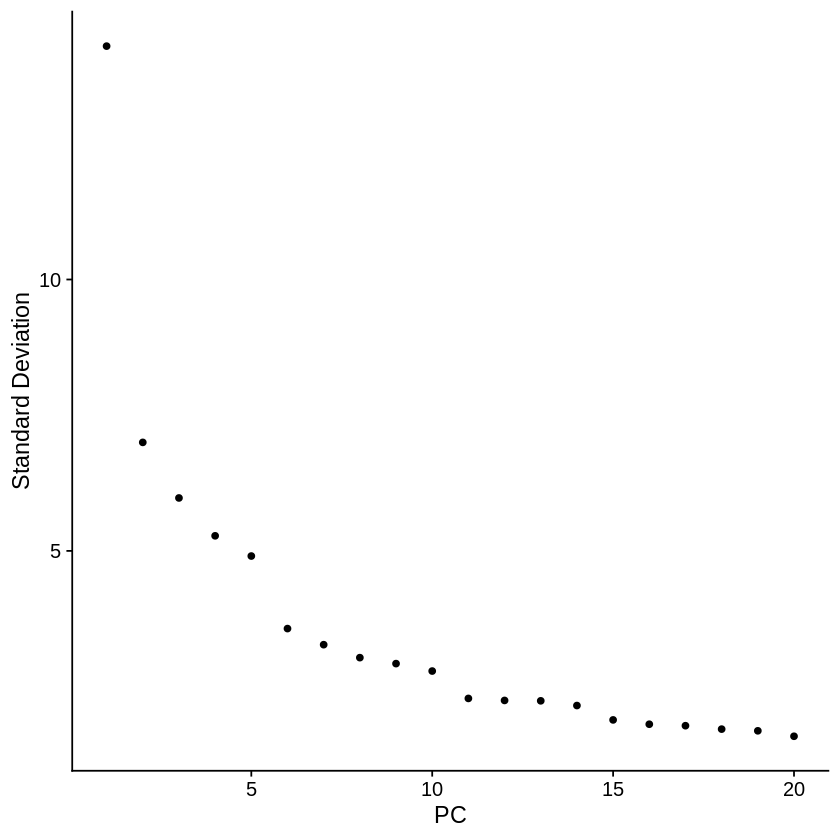

In [25]:
# pre-process standard workflow
pbmc.seurat.filtered <- NormalizeData(object = pbmc.seurat.filtered)
pbmc.seurat.filtered <- FindVariableFeatures(object = pbmc.seurat.filtered)
pbmc.seurat.filtered <- ScaleData(object = pbmc.seurat.filtered)
pbmc.seurat.filtered <- RunPCA(object = pbmc.seurat.filtered)
ElbowPlot(pbmc.seurat.filtered)
pbmc.seurat.filtered <- FindNeighbors(object = pbmc.seurat.filtered, dims = 1:20)
pbmc.seurat.filtered <- FindClusters(object = pbmc.seurat.filtered)
pbmc.seurat.filtered <- RunUMAP(object = pbmc.seurat.filtered, dims = 1:20)

In [27]:
## pK Identification (no ground-truth) ---------------------------------------------------------------------------------------
sweep.res.list_pbmc <- paramSweep_v3(pbmc.seurat.filtered, PCs = 1:20, sct = FALSE)
sweep.stats_pbmc <- summarizeSweep(sweep.res.list_pbmc, GT = FALSE)
bcmvn_pbmc <- find.pK(sweep.stats_pbmc)

ggplot(bcmvn_pbmc, aes(pK, BCmetric, group = 1)) +
  geom_point() +
  geom_line()

ERROR: Error in paramSweep_v3(pbmc.seurat.filtered, PCs = 1:20, sct = FALSE): could not find function "paramSweep_v3"


In [ ]:
pK <- bcmvn_pbmc %>% # select the pK that corresponds to max bcmvn to optimize doublet detection
  filter(BCmetric == max(BCmetric)) %>%
  select(pK) 
pK <- as.numeric(as.character(pK[[1]])

In [23]:

## Homotypic Doublet Proportion Estimate -------------------------------------------------------------------------------------
annotations <- pbmc.seurat.filtered@meta.data$seurat_clusters
homotypic.prop <- modelHomotypic(annotations)           ## ex: annotations <- seu_kidney@meta.data$ClusteringResults
nExp_poi <- round(0.076*nrow(pbmc.seurat.filtered@meta.data))  ## Assuming 7.5% doublet formation rate - tailor for your dataset
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))

ERROR: Error in modelHomotypic(annotations): could not find function "modelHomotypic"


In [ ]:
# run doubletFinder 
pbmc.seurat.filtered <- doubletFinder_v3(pbmc.seurat.filtered, 
                                     PCs = 1:20, 
                                     pN = 0.25, 
                                     pK = pK, 
                                     nExp = nExp_poi.adj,
                                     reuse.pANN = FALSE, sct = FALSE)

In [ ]:
# visualize doublets
DimPlot(pbmc.seurat.filtered, reduction = 'umap', group.by = "DF.classifications_0.25_0.21_691")

In [ ]:
# number of singlets and doublets
table(pbmc.seurat.filtered@meta.data$DF.classifications_0.25_0.21_691)